In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import time

## import self-written packages 
from nfdr2.util import *
import nfdr2.method as md
import nfdr2.data_loader as dl

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
output_folder = '/data3/martin/nfdr2_simulation_data/gtex_adipose_chr21'

In [10]:
p, x, n_full, cate_name, cis_name = dl.load_GTEx('Adipose_Subcutaneous-chr21')

load Adipose_Subcutaneous-chr21


In [29]:
data_list = ['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum']
for data_name in data_list:
    p, x, n_full, cate_name, cis_name = dl.load_GTEx(data_name+'-chr21')
# data_name = 'Adipose_Subcutaneous'
    f_small = open(output_folder+'/%s_chr21_r_small'%data_name, 'w')
    for i in range(10000):
        f_small.write('%0.8f, %s, %0.8f, %0.8f, %d, %d\n'\
                      %(p[i], cis_name[i], x[i,0], x[i,1], x[i,2], x[i,3]))
    f_small.close()

    f_full = open(output_folder+'/%s_chr21_r'%data_name, 'w')
    for i in range(p.shape[0]):
        f_full.write('%0.8f, %s, %0.8f, %0.8f, %d, %d\n'\
                     %(p[i], cis_name[i], x[i,0], x[i,1], x[i,2], x[i,3]))
    f_full.close()

load Adipose_Subcutaneous-chr21
load Adipose_Visceral_Omentum-chr21


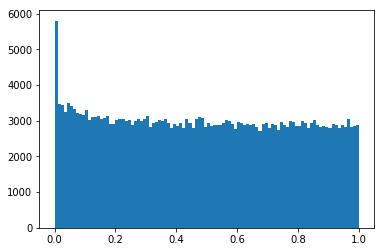

In [32]:
plt.figure()
plt.hist(p, bins=100)
plt.show()

In [20]:
x[0]

array([      0.3483,       0.2326, -414514.    ,      15.    ])

load Adipose_Subcutaneous


In [3]:
x.shape

(7325711, 4)

In [5]:
output_folder = '/data3/martin/gtex_data/GTEx_Analysis_v7_eQTL_all_associations'
fil = open(output_folder+'/GTEx_small.pickle','wb') 
pickle.dump(p[0:50000], fil)
pickle.dump(x[0:50000], fil)
pickle.dump(cis_name[0:50000], fil)
fil.close()  

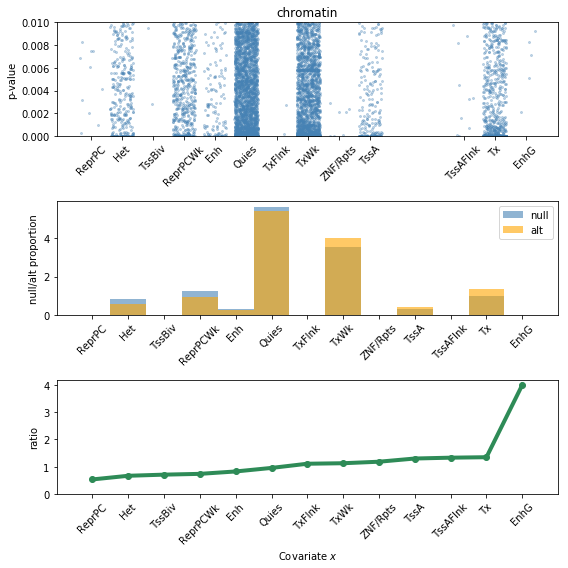

In [112]:
np.set_printoptions(precision=16,suppress=True)
md.feature_explore(p,x,vis_dim=[3],cate_name=cate_name,\
                   title_list = ['a', 'b', 'distance', 'chromatin'])